In [1]:
import ROOT
#import numpy as np

Welcome to JupyROOT 6.18/00


In [2]:
#Double_t RBWGaus(Double_t *x, Double_t *par) { #preservar o que vem depois do Double_t

      #Fit parameters:
      #par[0]=Width (scale) Breit-Wigner
      #par[1]=Most Probable (MP, location) Breit mean
      #par[2]=Total area (integral -inf to inf, normalization constant)
      #par[3]=Width (sigma) of convoluted Gaussian function

def RBWGaus(x, par, xx, fbw):

    np = 100 # #number of convolution steps
    sc = 4 #convolution extends to +-sc Gaussian sigmas

          #Range of convolution integral
    xmin = x[0] - sc * par[3]
    xmax = x[0] + sc * par[3]
    step = (xmax-xmin) / np
    
    # Convolution integral of Breit-Wigner and Gaussian by sum
    sum = 0.0
    for i in range (1, np/2):
     xx = xmin + (i-.5) * step
     fbw = ROOT.BreitWigner(xx,par[1],par[0])
     sum += fbw * ROOT.Gaus(x[0],xx,par[3])

     xx = xmax - (i-.5) * step
     fbw = ROOT.BreitWigner(xx,par[1],par[0])
     sum += fbw * ROOT.Gaus(x[0],xx,par[3])
    return (par[2] * step * sum * (1./sqrt(2*ROOT.Pi())) / par[3])

In [3]:

#def Zmass_Zcharge(Zmass, Zcharge):
    c = ROOT.TCanvas("c", "c", 600, 600)
    f = ROOT.TFile.Open("Zbosons.root")
    tr = f.Get("ztree")
    tr.Show (0)
    N = tr.GetEntries ()
    print (N)
    hist = ROOT.TH1F("hmass","", 60,60,120)

    for j in range(0, tr.GetEntries()):

        tr.GetEntry(j)

        if(tr.Zcharge != 0):
            continue

        hist.Fill(tr.Zmass)
        hist.Draw()
        c.Draw()
        
        

1921


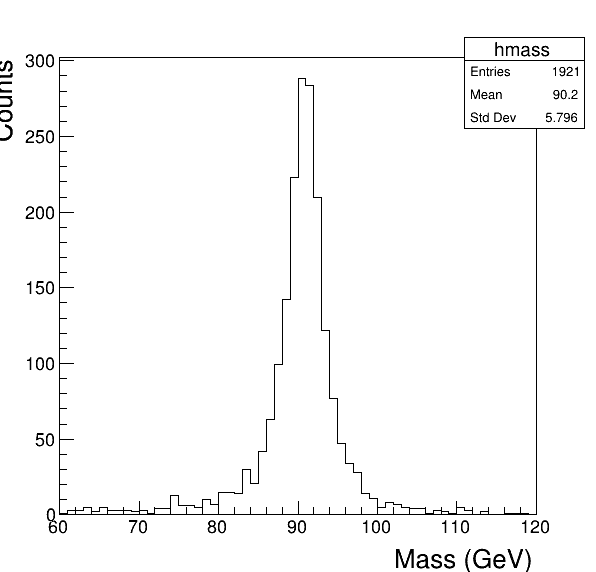

In [4]:
c1 = ROOT.TCanvas("c1","Dimuon mass", 600, 600)

c1.SetTopMargin(0.05)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.12)
c1.SetLeftMargin(0.13)
c1.SetTickx(1)
c1.SetTicky(1)



hist.SetMarkerStyle(20)
hist.SetMarkerColor(ROOT.kBlack)
hist.SetLineColor(ROOT.kBlack)
hist.GetXaxis().SetTitle("Mass (GeV)")
hist.GetYaxis().SetTitle("Counts")
hist.GetXaxis().SetTitleSize(0.05)
hist.GetYaxis().SetTitleSize(0.05)  
hist.GetYaxis().SetTitleOffset(1.2)
   #gStyle.SetOptStat(0) ---->>>> o que era pra ter aqui??
#c1.Update()

hist.Draw()
c.Draw()

 FCN=260.347 FROM MIGRAD    STATUS=CONVERGED      94 CALLS          95 TOTAL
                     EDM=2.78641e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.34140e+02   9.00129e+00   1.25548e-02  -5.31676e-05
   2  Mean         9.07898e+01   6.94861e-02   1.73710e-04   4.49114e-05
   3  Sigma        2.82951e+00   8.36473e-02  -9.81739e-06  -6.67442e-02


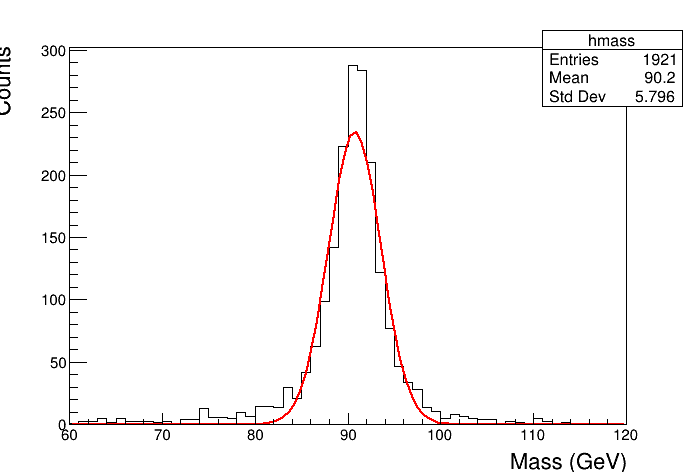

In [5]:
 
c2 = ROOT.TCanvas()
hist.Draw()
#FitResultPtr 
ff= hist.Fit("gaus","S")   #itResultPtr
c2.Draw()


In [6]:
ftr = ff.Get ()
central_value = ff.Parameter (1)
print(central_value)
width = ff.Parameter (2)
print(width)
chi2_nparams = (ff.Chi2(), ff.NFreeParameters())
print ("The final Chi2 value was %.2f and the number of free parameters was %d" %chi2_nparams)

90.78983263672
2.829512578221559
The final Chi2 value was 260.35 and the number of free parameters was 3
